       DR_NO  Date Rptd   DATE OCC  TIME OCC  AREA    AREA NAME  Rpt Dist No  \
0   10304468 2020-01-08 2020-01-08      2230     3    Southwest          377   
1  190101086 2020-01-02 2020-01-01       330     1      Central          163   
2  200110444 2020-04-14 2020-02-13      1200     1      Central          155   
3  191501505 2020-01-01 2020-01-01      1730    15  N Hollywood         1543   
4  191921269 2020-01-01 2020-01-01       415    19      Mission         1998   

   Part 1-2  Crm Cd                                        Crm Cd Desc  \
0         2     624                           BATTERY - SIMPLE ASSAULT   
1         2     624                           BATTERY - SIMPLE ASSAULT   
2         2     845          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE   
3         2     745           VANDALISM - MISDEAMEANOR ($399 OR UNDER)   
4         2     740  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...   

          Mocodes  Vict Age Vict Sex Vict Descent  Premis Cd  \
0       04

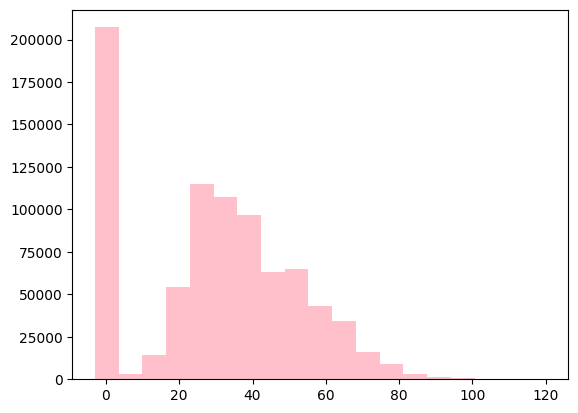

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

# Assuming these are your column names, replace them with your actual column names
header = ["DR_NO", "Date Rptd", "DATE OCC", "TIME OCC", "AREA", "AREA NAME", "Rpt Dist No", "Part 1-2",
          "Crm Cd", "Crm Cd Desc", "Mocodes", "Vict Age", "Vict Sex", "Vict Descent", "Premis Cd",
          "Premis Desc", "Weapon Used Cd", "Weapon Desc", "Status", "Status Desc",
          "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4", "LOCATION", "Cross Street", "LAT", "LON"]

# Read the CSV file with the specified header
df = pd.read_csv("/content/Crime_Data_from_2020_to_Present_20231112.csv", header=None, names=header, skiprows=1, parse_dates=[2,1])


# Check the first few rows of the DataFrame
print(df.head())

# Display basic information about the DataFrame
print(df.info())

# Display the shape of the DataFrame
print(df.shape)

# Display basic statistics of the numerical columns
print(df.describe())

# Display basic statistics of the categorical columns
print(df.describe(include=['O']))

# Check for missing values
print(df.isnull().sum())

# Check for duplicate rows in the whole DataFrame
duplicate_rows = df[df.duplicated()]

# If duplicate_rows is empty, there are no duplicates
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found:")
    print(duplicate_rows)

# Check for duplicate values in the 'DR_NO' column
duplicate_values = df[df['DR_NO'].duplicated()]

# If duplicate_values is empty, there are no duplicates in that column
if duplicate_values.empty:
    print("No duplicate values found in the 'DR_NO' column.")
else:
    print("Duplicate values found in the 'DR_NO' column:")
    print(duplicate_values)


# Plot the 'Vict Age' column using Sturges' Formula to calculate bins
bins = int(np.log2(len(df["Vict Age"])))
plt.hist(df["Vict Age"], bins=bins, color="pink")
plt.show()




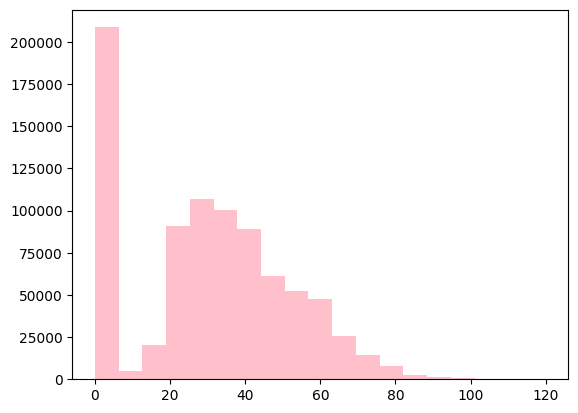

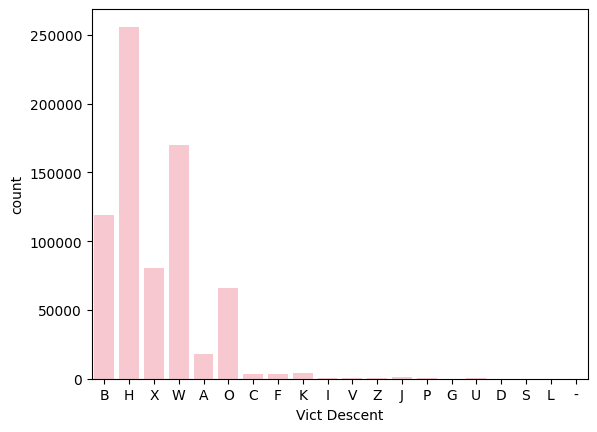

In [ ]:
# Filter out age entries less than 0 years old
mask = df["Vict Age"] >= 0
df = df[mask]

# Plot the 'Vict Age' column after filtering
plt.hist(df["Vict Age"], bins=bins, color="pink")
plt.show()

# Visualize the count of values in the 'Vict Descent' column
sns.countplot(x=df["Vict Descent"], color="pink")
plt.show()

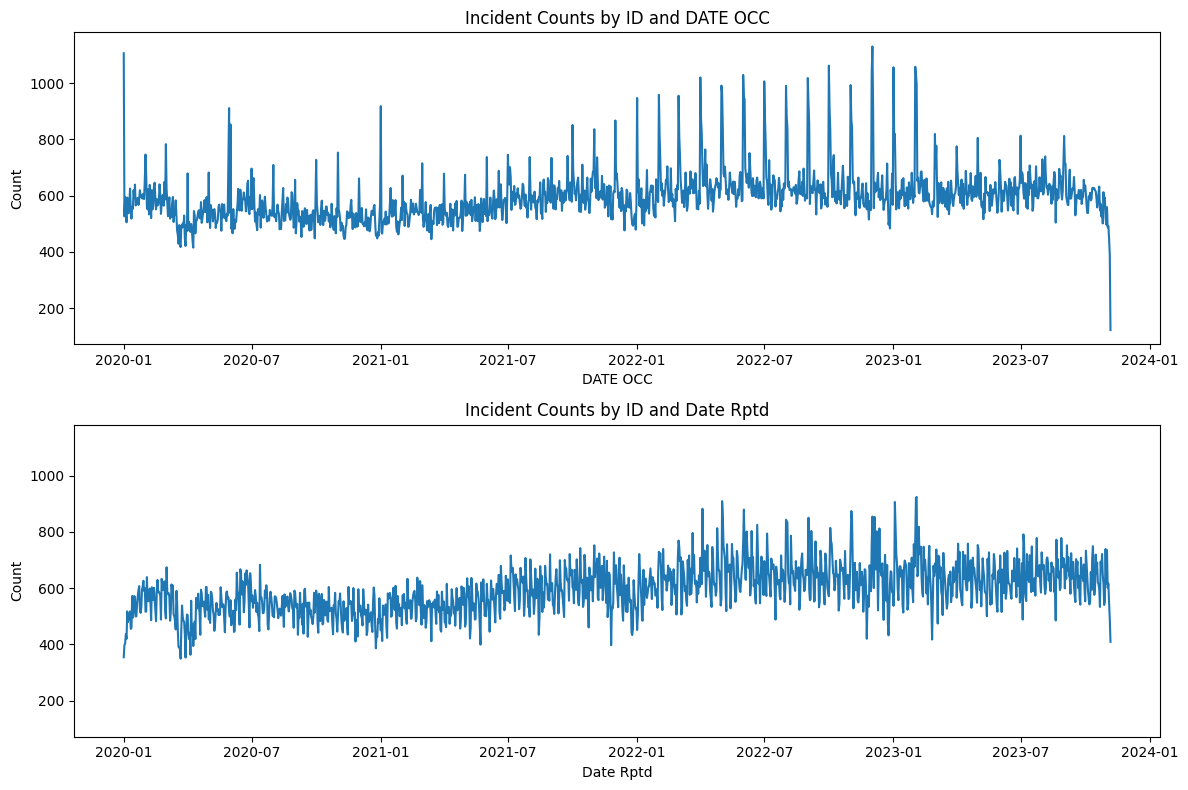

In [ ]:
# Visualize the incident counts by date of occurrence and date reported
incident_counts_occ = df.groupby(["DATE OCC"])["DR_NO"].size().reset_index(name="Count")
incident_counts_rptd = df.groupby(["Date Rptd"])["DR_NO"].size().reset_index(name="Count")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharey=True)
ax1.plot(incident_counts_occ["DATE OCC"], incident_counts_occ["Count"])
ax1.set_title("Incident Counts by ID and DATE OCC")
ax1.set_xlabel("DATE OCC")
ax1.set_ylabel("Count")

ax2.plot(incident_counts_rptd["Date Rptd"], incident_counts_rptd["Count"])
ax2.set_title("Incident Counts by ID and Date Rptd")
ax2.set_xlabel("Date Rptd")
ax2.set_ylabel("Count")

plt.tight_layout()
plt.show()


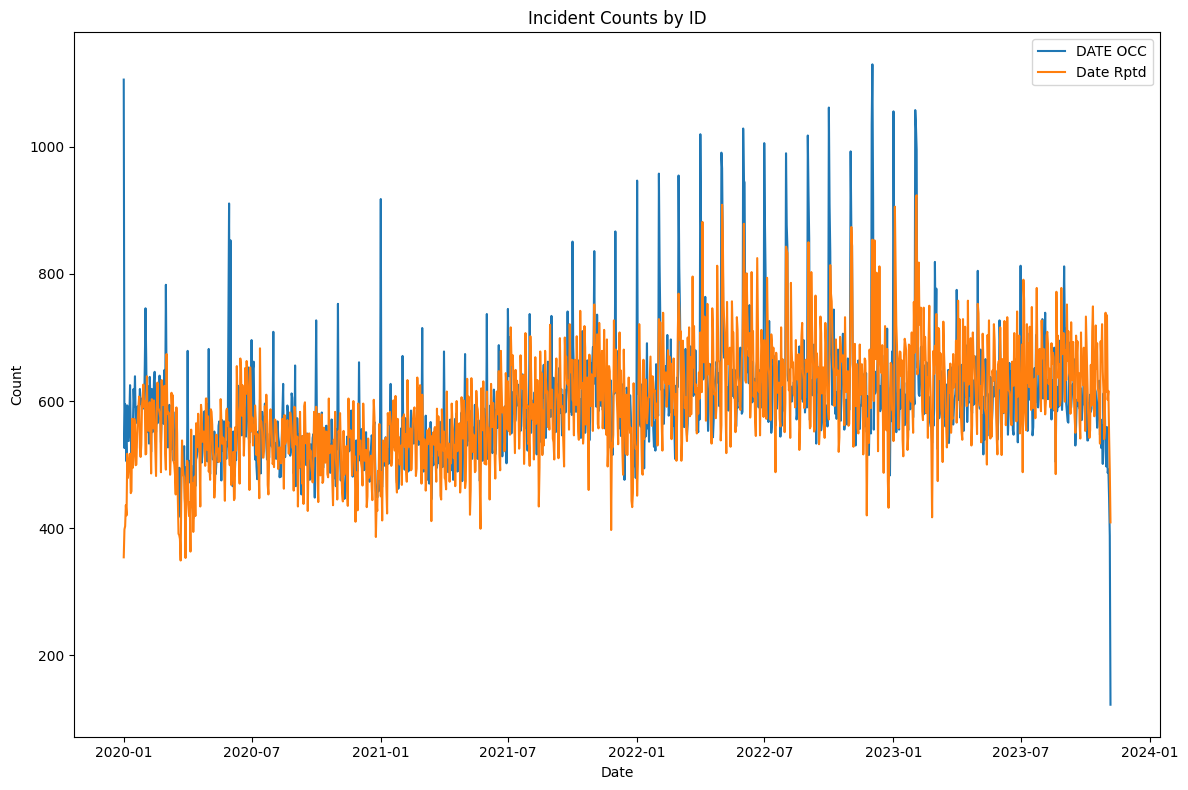

In [ ]:
plt.figure(figsize=(12, 8))

# Plot the data for DATE OCC
plt.plot(incident_counts_occ["DATE OCC"], incident_counts_occ["Count"], label="DATE OCC")

# Plot the data for Date Rptd
plt.plot(incident_counts_rptd["Date Rptd"], incident_counts_rptd["Count"], label="Date Rptd")

# Set titles and labels
plt.title("Incident Counts by ID")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()  # Show legend to distinguish between DATE OCC and Date Rptd

plt.tight_layout()
plt.show()


count    834248.000000
mean         10.526171
std          57.334875
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max        1405.000000
Name: diff_occ_rptd, dtype: float64


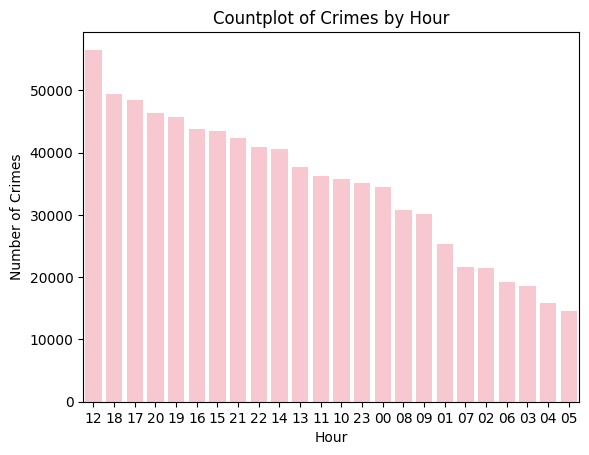

In [ ]:
# Create a new column to calculate the difference between occurrence and report dates
df["diff_occ_rptd"] = (df["Date Rptd"] - df["DATE OCC"]).dt.days
print(df["diff_occ_rptd"].describe())

# Visualize the count of crimes by hour
df['TIME OCC'] = df['TIME OCC'].astype(str)
df['TIME OCC'] = df['TIME OCC'].apply(lambda x: x.zfill(4))
df['TIME OCC'] = df['TIME OCC'].str[:2] + ':' + df['TIME OCC'].str[2:]
df["hour"] = df['TIME OCC'].str.split(':').str[0]

sns.countplot(data=df, x="hour", order=df['hour'].value_counts().index, color="pink")
plt.title('Countplot of Crimes by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes')
plt.show()


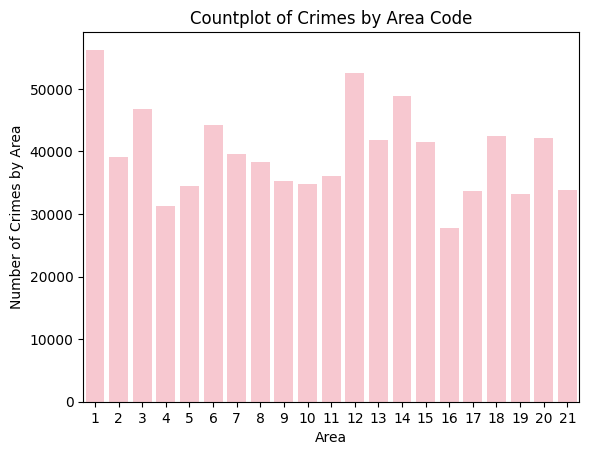

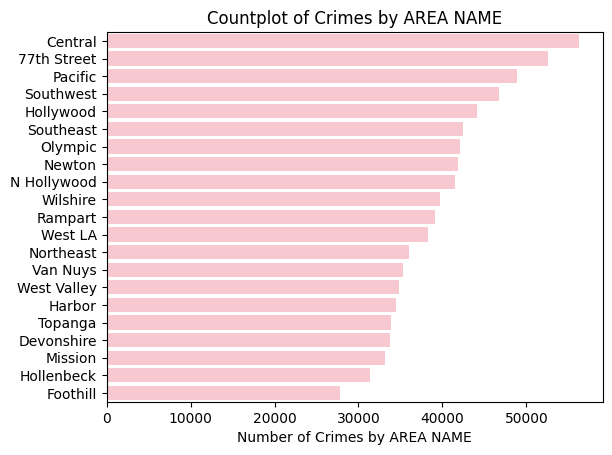

In [ ]:
# Visualize the count of crimes by area code
sns.countplot(data=df, x="AREA", order=sorted(df['AREA'].unique()), color="pink")
plt.title('Countplot of Crimes by Area Code')
plt.xlabel('Area')
plt.ylabel('Number of Crimes by Area')
plt.show()

# Visualize the count of crimes by area name
sns.countplot(data=df, y="AREA NAME", order=df['AREA NAME'].value_counts().index, color="pink")
plt.title('Countplot of Crimes by AREA NAME')
plt.xlabel('Number of Crimes by AREA NAME')
plt.ylabel('')
plt.show()

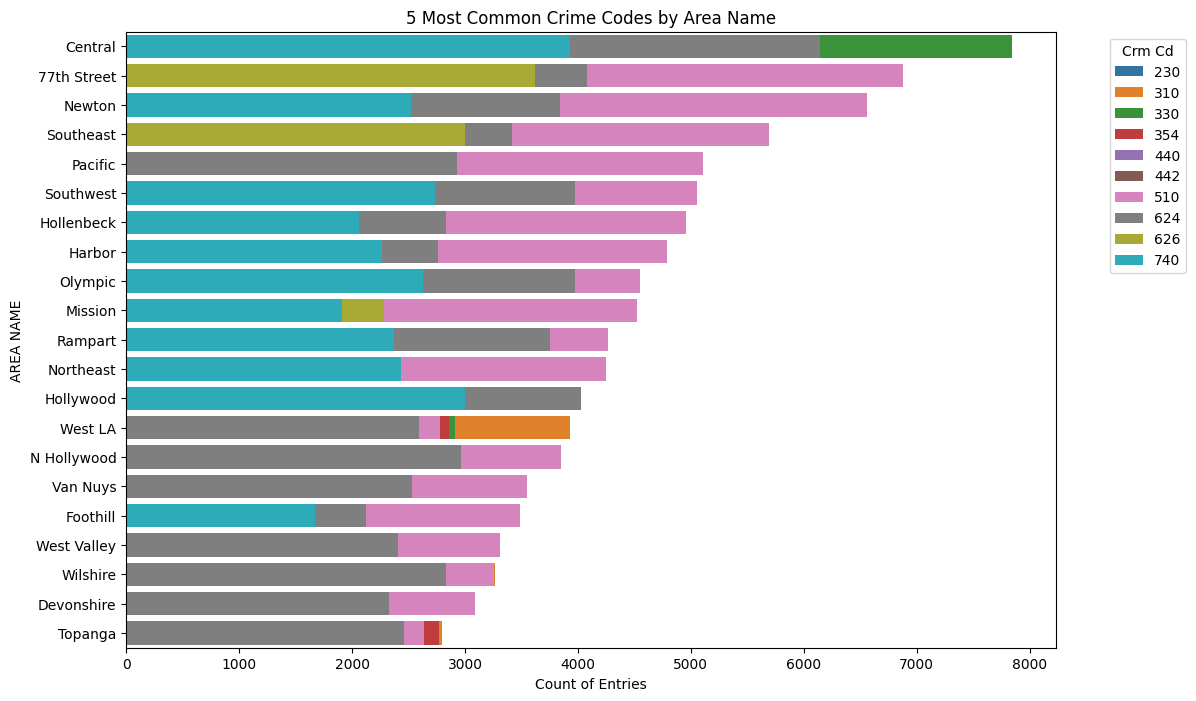

In [ ]:
# Check and handle the "Rpt Dist No" column
df["Rpt Dist No"] = df["Rpt Dist No"].astype(str).apply(lambda x: '0' + x if len(x) == 3 else x)

# Visualize the count of crimes by crime code and area name
crime_counts = df.groupby(['AREA NAME', 'Crm Cd']).size().reset_index(name='Count')
crime_counts = crime_counts.sort_values(by=['AREA NAME', 'Count'], ascending=[True, False])
top_5_crime_codes = crime_counts.groupby('AREA NAME').head(5)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_5_crime_codes, x='Count', y='AREA NAME', hue='Crm Cd', dodge=False, order=top_5_crime_codes.sort_values(by='Count', ascending=False)['AREA NAME'].unique())
plt.title('5 Most Common Crime Codes by Area Name')
plt.xlabel('Count of Entries')
plt.ylabel('AREA NAME')
plt.legend(title='Crm Cd', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
df["Crm Cd Desc"].nunique()

138

In [ ]:
# Create a mapping of cleaned categories
category_mapping = {'CREDIT CARDS, FRAUD USE ($950 & UNDER':'Fraud',
 'DOCUMENT WORTHLESS ($200.01 & OVER)':'Forgery',
 'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)':'Embezzlement',
 'BLOCKING DOOR INDUCTION CENTER':'Blocking Door Induction',
 'PANDERING':'Prostitution',
 'CREDIT CARDS, FRAUD USE ($950.01 & OVER)':'Fraud',
 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE':'Human Trafficking',
 'THEFT, COIN MACHINE - PETTY ($950 & UNDER)':'Theft',
 'RECKLESS DRIVING':'Reckless Driving',
 'ILLEGAL DUMPING':'Illegal Dumping',
 'DISHONEST EMPLOYEE - GRAND THEFT':'Dishonest Employee',
 'DISHONEST EMPLOYEE - PETTY THEFT':'Dishonest Employee',
 'PURSE SNATCHING - ATTEMPT':'Theft',
 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01':'Defrauding an Innkeeper',
 'SHOPLIFTING - ATTEMPT':'Theft',
 'COUNTERFEIT':'Counterfitting',
 'DISHONEST EMPLOYEE ATTEMPTED THEFT':'Dishonest Employee',
 'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)':'Theft',
 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER':'Defrauding an Innkeeper',
 'MANSLAUGHTER, NEGLIGENT':'Manslaughter',
 'WEAPONS POSSESSION/BOMBING':'Weapon Possesion',
 'TILL TAP - PETTY ($950 & UNDER)':'Theft',
 'DRUNK ROLL':'Theft',
 'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)':'FIREARMS EMERGENCY PROTECTIVE ORDER',
 'TILL TAP - GRAND THEFT ($950.01 & OVER)':'Theft',
 'CONSPIRACY':'Conspiracy',
 'BRIBERY':'Bribery',
 'GRAND THEFT / INSURANCE FRAUD':'Fraud',
 'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)':'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)',
 'BIGAMY':'Bigamy',
 'TELEPHONE PROPERTY - DAMAGE':'Vandalism',
 'THEFT, COIN MACHINE - ATTEMPT':'Theft',
 'PICKPOCKET, ATTEMPT':'Theft',
 'DOCUMENT WORTHLESS ($200 & UNDER)':'Forgery',
 'DISRUPT SCHOOL':'Disrupt School',
 'LYNCHING':'Lynching',
 'BIKE - ATTEMPTED STOLEN':'Theft',
 'PETTY THEFT - AUTO REPAIR':'Theft','ROBBERY':'Robbery',
 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)':'Vandalism',
 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)':'Auto-Vehicle Theft',
 'VIOLATION OF RESTRAINING ORDER':'Violating restraining order',
 'BUNCO, GRAND THEFT':'Bunco',
 'THEFT OF IDENTITY':'Identity Theft',
 'BURGLARY FROM VEHICLE':'Auto-Vehicle Burglary',
 'INTIMATE PARTNER - SIMPLE ASSAULT':'Domestic Violence',
 'BATTERY - SIMPLE ASSAULT':'Battery',
 'CRIMINAL THREATS - NO WEAPON DISPLAYED':'Criminal Threats',
 'BURGLARY':'Burglary',
 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD':'Theft',
 'VIOLATION OF TEMPORARY RESTRAINING ORDER':'Violating restraining order',
 'TRESPASSING':'Trespassing',
 'BIKE - STOLEN':'Theft',
 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT':'Assault',
 'CONTEMPT OF COURT':'Contempt of Court',
 'THEFT PLAIN - PETTY ($950 & UNDER)':'Theft',
 'SHOTS FIRED AT INHABITED DWELLING':'Shooting at an inhabited Dwelling',
 'INTIMATE PARTNER - AGGRAVATED ASSAULT':'Domestic Violence',
 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)':'Auto-Vehicle Theft',
 'DISCHARGE FIREARMS/SHOTS FIRED':'Firearm Discharge',
 'ATTEMPTED ROBBERY':'Robbery',
 'BURGLARY, ATTEMPTED':'Burglary',
 'PICKPOCKET':'Theft',
 'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)':'Auto-Vehicle Theft',
 'OTHER MISCELLANEOUS CRIME':'Miscellaneous Crime',
 'OTHER ASSAULT':'Assault',
 'BRANDISH WEAPON':'Brandishing a weapon',
 'VIOLATION OF COURT ORDER':'Violating Court Order',
 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)':'Vandalism',
 'VEHICLE - ATTEMPT STOLEN':'Auto-Vehicle Theft',
 'CRUELTY TO ANIMALS':'Animal Abuse',
 'THREATENING PHONE CALLS/LETTERS':'Criminal Threats',
 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)':'Theft',
 'CRIMINAL HOMICIDE':'Homicide',
 'BATTERY POLICE (SIMPLE)':'Battery',
 'THEFT PLAIN - ATTEMPT':'Theft',
 'FIREARMS RESTRAINING ORDER (FIREARMS RO)':'Restraining Order',
 'EXTORTION':'Extortion',
 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)':'Embezzlement',
 'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)':'Theft',
 'DOCUMENT FORGERY / STOLEN FELONY':'Forgery',
 'BATTERY ON A FIREFIGHTER':'Battery',
 'UNAUTHORIZED COMPUTER ACCESS':'Hacking',
 'KIDNAPPING':'Kidnapping',
 'VEHICLE - STOLEN':'Auto-Vehicle Theft',
 'ORAL COPULATION':'Sexual Assault',
 'THEFT FROM MOTOR VEHICLE - ATTEMPT':'Auto-Vehicle Theft',
 'ARSON':'Arson',
 'THEFT, PERSON':'Theft',
 'BURGLARY FROM VEHICLE, ATTEMPTED':'Auto-Vehicle Theft',
 'BUNCO, PETTY THEFT':'Bunco',
 'FALSE IMPRISONMENT':'False Imprisonment',
 'THROWING OBJECT AT MOVING VEHICLE':'Throwing Objects at moving Vehicles',
 'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT':'Shooting at an occupied Vehicle',
 'DISTURBING THE PEACE':'Disturbing the peace',
 'FAILURE TO YIELD':'traffic infraction',
 'KIDNAPPING - GRAND ATTEMPT':'Kidnapping',
 'BOMB SCARE':'False report',
 'PROWLER':'Stalking',
 'FALSE POLICE REPORT':'False report',
 'THEFT FROM PERSON - ATTEMPT':'Theft',
 'PURSE SNATCHING':'Theft',
 'STALKING':'Stalking',
 'RESISTING ARREST':'Resisting Arrest',
 'CONTRIBUTING':'Contributing',
 'BUNCO, ATTEMPT':'Bunco',
 'DRIVING WITHOUT OWNER CONSENT (DWOC)':'Driving without owner conset',
 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER':'Assault',
 'CREDIT CARDS, FRAUD USE ($950 & UNDER':'Fraud',
 'DOCUMENT WORTHLESS ($200.01 & OVER)':'Forgery',
 'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)':'Embezzlement',
 'BLOCKING DOOR INDUCTION CENTER':'Blocking Door Induction',
 'PANDERING':'Prostitution'
}





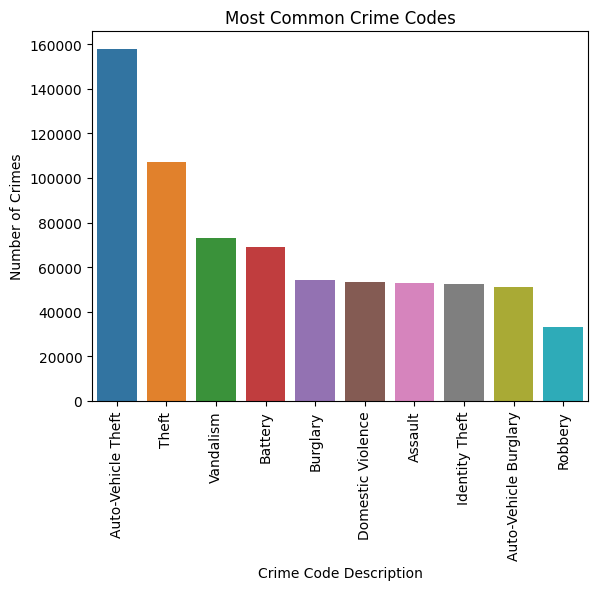

In [ ]:

df['Cleaned Crm Cd Desc'] = df['Crm Cd Desc'].map(category_mapping)
sns.barplot(x=df['Cleaned Crm Cd Desc'].value_counts().head(10).index, y=df['Cleaned Crm Cd Desc'].value_counts().head(10))

plt.ylabel("Number of Crimes")
plt.xlabel('Crime Code Description')
plt.title("Most Common Crime Codes")

plt.xticks(rotation=90)

plt.show()



In [ ]:

premis_cat_mapping = {
    'YARD (RESIDENTIAL/BUSINESS)': 'Residential',
    'NIGHT CLUB (OPEN EVENINGS ONLY)': 'Entertainment',
    'MINI-MART': 'Food Establishment',
    'AUTOMATED TELLER MACHINE (ATM)': 'Financial Institution',
    "SINGLE RESIDENCE OCCUPANCY (SRO'S) LOCATIONS": 'Residential',
    'School': 'Educational',
    'ALLEY': 'Street',
    'NURSING/CONVALESCENT/RETIREMENT HOME': 'Healthcare',
    'PATIO*': 'Outdoor',
    'OTHER RESIDENCE': 'Residential',
    'BANK': 'Financial Institution',
    'GAS STATION': 'Gas Station',
    'PORCH, RESIDENTIAL': 'Residential',
    'MOTEL': 'Lodging',
    'CAR WASH': 'Automotive',
    'WEBSITE': 'Online',
    'SIDEWALK': 'Outdoor',
    'Restaurant/Fast Food': 'Food Establishment',
    'Park/Playground': 'Outdoor',
    'Apartment/Condo': 'Residential',
    'Residential': 'Residential',
    'MARKET': 'Food Establishment',
    'LA UNION STATION (NOT LINE SPECIFIC)': 'Transportation',
    'MTA BUS': 'Public Transportation',
    'VEHICLE, PASSENGER/TRUCK': 'Vehicle',
    'OTHER BUSINESS': 'Business',
    'STREET': 'Street',
    'CYBERSPACE': 'Cyberspace',
    'OTHER/OUTSIDE': 'Outdoor',
    'GARAGE/CARPORT': 'Residential',
    'OTHER PREMISE': 'Other',
    'HOTEL': 'Lodging',
    'Store': 'Retail',
    'BAR/COCKTAIL/NIGHTCLUB': 'Entertainment',
    'DRIVEWAY': 'Residential',
    'MEDICAL/DENTAL OFFICES': 'Healthcare',
    'MTA - ORANGE LINE - WOODMAN': 'Public Transportation',
    'CONVENTION CENTER': 'Entertainment',
    'Hospital': 'Healthcare',
    'PUBLIC STORAGE': 'Storage',
    'TRANSPORTATION FACILITY (AIRPORT)': 'Transportation',
    'SPORTS VENUE, OTHER': 'Entertainment',
    'MTA - RED LINE - 7TH AND METRO CENTER': 'Public Transportation',
    'SLIPS/DOCK/MARINA/BOAT': 'Marina',
    'OFFICE BUILDING/OFFICE': 'Office',
    '7TH AND METRO CENTER (NOT LINE SPECIFIC)': 'Public Transportation',
    'STUDIO (FILM/PHOTOGRAPHIC/MUSIC)': 'Entertainment',
    'DODGER STADIUM': 'Entertainment',
    'BUS STOP': 'Public Transportation',
    'BAR/SPORTS BAR (OPEN DAY & NIGHT)': 'Entertainment',
    'MAIL BOX': 'Mail Services',
    'CONDOMINIUM/TOWNHOUSE': 'Residential',
    "DIY CENTER (LOWE'S,HOME DEPOT,OSH,CONTRACTORS WAREHOUSE)": 'Retail',
    'HEALTH SPA/GYM': 'Healthcare',
    'STAIRWELL*': 'Residential',
    'ABANDONED BUILDING ABANDONED HOUSE': 'Residential',
    'VALET': 'Parking',
    'MTA - RED LINE - WILSHIRE/VERMONT': 'Public Transportation',
    'MTA - RED LINE - UNION STATION': 'Public Transportation',
    'TRANSIENT ENCAMPMENT': 'Outdoor',
    'THE BEVERLY CENTER': 'Retail',
    'TRANSITIONAL HOUSING/HALFWAY HOUSE': 'Residential',
    'FIRE STATION': 'Public Services',
    'STORAGE SHED': 'Storage',
    'TV/RADIO/APPLIANCE': 'Retail',
    'GROUP HOME': 'Residential',
    "MOBILE HOME/TRAILERS/CONSTRUCTION TRAILERS/RV'S/MOTORHOME": 'Residential',
    'VACANT LOT': 'Outdoor',
    'MISSIONS/SHELTERS': 'Residential',
    'COLLEGE/JUNIOR COLLEGE/UNIVERSITY': 'Educational',
    'COLISEUM': 'Entertainment',
    'TERMINAL, OTHER THAN MTA': 'Transportation',
    'MTA - RED LINE - HOLLYWOOD/VINE': 'Public Transportation',
    'DETENTION/JAIL FACILITY': 'Public Services',
    'BEACH': 'Outdoor',
    'THEATRE/MOVIE': 'Entertainment',
    'WAREHOUSE': 'Storage',
    'BALCONY*': 'Residential',
    'GARMENT MANUFACTURER': 'Manufacturing',
    "VEHICLE STORAGE LOT (CARS, TRUCKS, RV'S, BOATS, TRAILERS, ETC.)": 'Vehicle',
    'SPORTS ARENA': 'Entertainment',
    'CHECK CASHING*': 'Financial Institution',
    'THE GROVE': 'Retail',
    'MTA - RED LINE - VERMONT/SUNSET': 'Public Transportation',
    'TAXI': 'Vehicle',
    'DRIVE THRU*': 'Food Establishment',
    'LAUNDROMAT': 'Retail',
    'LIBRARY': 'Educational',
    'POLICE FACILITY': 'Public Services',
    'CONSTRUCTION SITE': 'Construction',
    'NAIL SALON': 'Beauty',
    'NAN': 'Other',
    'CHURCH/CHAPEL (CHANGED 03-03 FROM CHURCH/TEMPLE)': 'Religious',
    'MTA - EXPO LINE - EXPO/VERMONT': 'Public Transportation',
    'THE BEVERLY CONNECTION': 'Retail',
    'METROLINK TRAIN': 'Public Transportation',
    'MTA - GREEN LINE - AVALON': 'Public Transportation',
    'POST OFFICE': 'Mail Services',
    'MTA - BLUE LINE - 103RD/WATTS TOWERS': 'Public Transportation',
    'SHORT-TERM VACATION RENTAL': 'Lodging',
    'SYNAGOGUE/TEMPLE':"Religious",
    'MTA - GOLD LINE - UNION STATION': 'Public Transportation',
    'GUN/SPORTING GOODS': 'Retail',
    'MUSEUM': 'Entertainment',
    'MTA - BLUE LINE - VERNON': 'Public Transportation',
    'MTA - RED LINE - HOLLYWOOD/WESTERN': 'Public Transportation',
    'AUTO DEALERSHIP (CHEVY, FORD, BMW, MERCEDES, ETC.)': 'Automotive',
    'TOOL SHED*': 'Residential',
    'MANUFACTURING COMPANY': 'Manufacturing',
    'TATTOO PARLOR*': 'Beauty',
    'GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & CITY)': 'Government',
    'MTA - EXPO LINE - LATTC/ORTHO INSTITUTE': 'Public Transportation',
    'ELEVATOR': 'Residential',
    'TOW YARD*': 'Automotive',
    'PROJECT/TENEMENT/PUBLIC HOUSING': 'Residential',
    'MTA - RED LINE - VERMONT/BEVERLY': 'Public Transportation',
    'MTA - GREEN LINE - HARBOR FWY': 'Public Transportation',
    'CREDIT UNION': 'Financial Institution',
    'RECYCLING CENTER': 'Recycling',
    'MUNICIPAL BUS LINE INCLUDES LADOT/DASH': 'Public Transportation',
    'MTA - RED LINE - HOLLYWOOD/HIGHLAND': 'Public Transportation',
    'MTA - EXPO LINE - EXPO/CRENSHAW': 'Public Transportation',
    'MTA - RED LINE - UNIVERSAL CITY/STUDIO CITY': 'Public Transportation',
    'HARDWARE/BUILDING SUPPLY': 'Retail',
    'DAY CARE/ADULTS*': 'Childcare',
    'MEDICAL MARIJUANA FACILITIES/BUSINESSES': 'Healthcare',
    'MTA - EXPO LINE - EXPO/WESTERN': 'Public Transportation',
    'MTA - GREEN LINE - AVIATION/LAX': 'Public Transportation',
    'FREEWAY': 'Street',
    'BUS-CHARTER/PRIVATE': 'Public Transportation',
    'BUS DEPOT/TERMINAL, OTHER THAN MTA': 'Public Transportation',
    'PUBLIC RESTROOM/OUTSIDE*': 'Public Restroom',
    'MTA - EXPO LINE - JEFFERSON/USC': 'Public Transportation',
    'AUTO SALES LOT': 'Automotive',
    'MTA - RED LINE - NORTH HOLLYWOOD': 'Public Transportation',
    'POOL-PUBLIC/OUTDOOR OR INDOOR*': 'Entertainment',
    'MTA - SILVER LINE - HARBOR GATEWAY TRANSIT CTR': 'Public Transportation',
    'MTA - BLUE LINE - 7TH AND METRO CENTER': 'Public Transportation',
    'FACTORY': 'Manufacturing',
    'UNDERPASS/BRIDGE*': 'Street',
    'FINANCE COMPANY': 'Financial Institution',
    'GOLF COURSE*': 'Recreation',
    'BOWLING ALLEY*': 'Recreation',
    'MASSAGE PARLOR': 'Beauty',
    'MTA - RED LINE - VERMONT/SANTA MONICA': 'Public Transportation',
    'MTA - RED LINE - PERSHING SQUARE': 'Public Transportation',
    'MTA - BLUE LINE - WASHINGTON': 'Public Transportation',
    'RIVER BED*': 'Outdoor',
    'GREYHOUND OR INTERSTATE BUS': 'Public Transportation',
    'MTA - BLUE LINE - PICO': 'Public Transportation',
    'CATERING/ICE CREAM TRUCK': 'Food Establishment',
    'MTA - BLUE LINE - SAN PEDRO': 'Public Transportation',
    'CLEANER/LAUNDROMAT': 'Retail',
    'TRAIN TRACKS': 'Transportation',
    'MTA - PURPLE LINE - WILSHIRE/WESTERN': 'Public Transportation',
    'MTA - ORANGE LINE - VAN NUYS': 'Public Transportation',
    'FOSTER HOME BOYS OR GIRLS*': 'Residential',
    'MTA - ORANGE LINE - BALBOA': 'Public Transportation',
    'AMTRAK TRAIN': 'Public Transportation',
    'HIGH-RISE BUILDING': 'Residential',
    'VISION CARE FACILITY*': 'Healthcare',
    'DELIVERY SERVICE (FED EX, UPS, COURIERS,COURIER SERVICE)*': 'Delivery Service',
    'ESCALATOR*': 'Transportation',
    'ENTERTAINMENT/COMEDY CLUB (OTHER)': 'Entertainment',
    'STAPLES CENTER *': 'Entertainment',
    'MTA - EXPO LINE - EXPO/LA BREA': 'Public Transportation',
    'TRAIN, OTHER THAN MTA (ALSO QUERY 809/810/811)': 'Public Transportation',
    'MTA - SILVER LINE - MANCHESTER': 'Public Transportation',
    'BANK DROP BOX/MONEY DROP-OUTSIDE OF BANK*': 'Financial Institution',
    'PUBLIC RESTROOM(INDOORS-INSIDE)': 'Public Restroom',
    'BUS STOP/LAYOVER (ALSO QUERY 124)': 'Public Transportation',
    'MTA - EXPO LINE - FARMDALE': 'Public Transportation',
    'MTA - GOLD LINE - CHINATOWN': 'Public Transportation',
    'MTA - EXPO LINE - 7TH AND METRO CENTER': 'Public Transportation',
    'ENERGY PLANT/FACILITY': 'Energy Plant',
    'MTA - EXPO LINE - EXPO/BUNDY': 'Public Transportation',
    'OTHER RR TRAIN (UNION PAC, SANTE FE ETC': 'Transportation',
    'MTA - ORANGE LINE - ROSCOE': 'Public Transportation',
    'SWAP MEET': 'Retail',
    'AIRCRAFT': 'Transportation',
    'MTA - GOLD LINE - SOTO': 'Public Transportation',
    'MTA - EXPO LINE - LA CIENEGA/JEFFERSON': 'Public Transportation',
    'MTA - ORANGE LINE - NORTH HOLLYWOOD': 'Public Transportation',
    'PEDESTRIAN OVERCROSSING': 'Transportation',
    'MTA - ORANGE LINE - RESEDA': 'Public Transportation',
    'MTA - EXPO LINE - PALMS': 'Public Transportation',
    'OTHER PLACE OF WORSHIP': 'Religious',
    'CEMETARY*': 'Religious',
    'BASKETBALL COURTS': 'Recreation',
    'MTA - GOLD LINE - MARIACHI PLAZA': 'Public Transportation',
    'MTA - BLUE LINE - GRAND/LATTC': 'Public Transportation',
    'FRAT HOUSE/SORORITY/DORMITORY': 'Residential',
    'SAVINGS & LOAN': 'Financial Institution',
    'TRUCK, COMMERICAL': 'Vehicle',
    'MTA - GOLD LINE - LINCOLN/CYPRESS': 'Public Transportation',
    'MTA - SILVER LINE - SLAUSON': 'Public Transportation',
    'DAY CARE/CHILDREN*': 'Childcare',
    'MTA - PURPLE LINE - WILSHIRE/VERMONT': 'Public Transportation',
    'MTA - EXPO LINE - PICO': 'Public Transportation',
    'DRIVE THRU BANKING (WINDOW)*': 'Financial Institution',
    'TELECOMMUNICATION FACILITY/LOCATION': 'Telecommunication',
    'ARCADE,GAME ROOM/VIDEO GAMES (EXAMPLE CHUCKIE CHEESE)*': 'Entertainment',
    'MOSQUE*': 'Religious',
    'ABORTION CLINIC/ABORTION FACILITY*': 'Healthcare',
    'EQUIPMENT RENTAL': 'Retail',
    'DAM/RESERVOIR': 'Infrastructure',
    'MTA - PURPLE LINE - 7TH AND METRO CENTER': 'Public Transportation',
    'MORTUARY': 'Funeral Services',
    'MTA - ORANGE LINE - TAMPA': 'Public Transportation',
    'MTA - EXPO LINE - EXPO/SEPULVEDA': 'Public Transportation',
    'MTA - ORANGE LINE - VALLEY COLLEGE': 'Public Transportation',
    'TRAIN DEPOT/TERMINAL, OTHER THAN MTA': 'Public Transportation',
    'MTA - ORANGE LINE - PIERCE COLLEGE': 'Public Transportation',
    'METHADONE CLINIC': 'Healthcare',
    'MTA - ORANGE LINE - DE SOTO': 'Public Transportation',
    'MTA - GOLD LINE - HERITAGE SQ': 'Public Transportation',
    'MTA - ORANGE LINE - NORDHOFF': 'Public Transportation',
    'MTA - PURPLE LINE - WILSHIRE/NORMANDIE': 'Public Transportation',
    'MTA - ORANGE LINE - LAUREL CANYON': 'Public Transportation',
    'TUNNEL': 'Transportation',
    'MTA - GOLD LINE - PICO/ALISO': 'Public Transportation',
    'MTA - PURPLE LINE - PERSHING SQUARE': 'Public Transportation',
    'CULTURAL SIGNIFICANCE/MONUMENT': 'Entertainment',
    'WATER FACILITY': 'Infrastructure',
    'MTA - ORANGE LINE - WOODLEY': 'Public Transportation',
    'MTA - ORANGE LINE - SEPULVEDA': 'Public Transportation',
    'TRASH CAN/TRASH DUMPSTER': 'Waste Management',
    'HOSPICE': 'Healthcare',
    'PAY PHONE': 'Telecommunication',
    'MASS GATHERING LOCATION': 'Entertainment',
    'MTA - GOLD LINE - SOUTHWEST MUSEUM': 'Public Transportation',
    'MTA - GOLD LINE - INDIANA': 'Public Transportation',
    'MTA - ORANGE LINE - CANOGA': 'Public Transportation',
    'MTA - ORANGE LINE - CHATSWORTH': 'Public Transportation',
    'MTA - ORANGE LINE - SHERMAN WAY': 'Public Transportation',
    'COMPUTER SERVICES/REPAIRS/SALES': 'Technology',
    'MTA - SILVER LINE - LAC/USC MEDICAL CENTER': 'Public Transportation',
    'MUSCLE BEACH': 'Recreation',
    'HARBOR FRWY STATION (NOT LINE SPECIFIC)': 'Public Transportation',
    'MTA - SILVER LINE - UNION STATION': 'Public Transportation',
    'OTHER INTERSTATE, CHARTER BUS': 'Public Transportation',
    'CHEMICAL STORAGE/MANUFACTURING PLANT': 'Manufacturing',
    'ABATEMENT LOCATION': 'Other',
    'MTA - SILVER LINE - PACIFIC COAST HWY': 'Public Transportation',
    'MTA - SILVER LINE - HARBOR FWY': 'Public Transportation',
    'SKATING RINK*': 'Recreation',
    'RETIRED (DUPLICATE) DO NOT USE THIS CODE': 'Other',
    'MTA - SILVER LINE - 37TH ST/USC': 'Public Transportation',
    'OIL REFINERY': 'Manufacturing',
    'HOCKEY RINK/ICE HOCKEY': 'Recreation',
    'MTA - PURPLE LINE - UNION STATION': 'Public Transportation',
    'MTA - SILVER LINE - ROSECRANS': 'Public Transportation',
     'RESTAURANT/FAST FOOD': 'Food Establishment',
    'PARKING LOT': 'Parking',
    'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)': 'Residential',
    'SINGLE FAMILY DWELLING': 'Residential',
    'PARK/PLAYGROUND': 'Outdoor',
    'MEMBERSHIP STORE (COSTCO,SAMS CLUB)*': 'Retail',
    'LIQUOR STORE': 'Retail',
    'PARKING UNDERGROUND/BUILDING': 'Parking',
    'DEPARTMENT STORE': 'Retail',
    'ELEMENTARY SCHOOL': 'Educational',
    'DRUG STORE': 'Retail',
    'DISCOUNT STORE (99 CENT,DOLLAR,ETC.)': 'Retail',
    'JUNIOR HIGH SCHOOL': 'Educational',
    'OTHER STORE': 'Retail',
    'HIGH SCHOOL': 'Educational',
    'HOSPITAL': 'Healthcare',
    'CLOTHING STORE': 'Retail',
    "COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET'S, ETC.)": 'Food Establishment',
    'NURSERY/FLOWER SHOP': 'Retail',
    'AUTO SUPPLY STORE*': 'Retail',
    'ELECTRONICS STORE (IE:RADIO SHACK, ETC.)': 'Retail',
    'SHOPPING MALL (COMMON AREA)': 'Retail',
    'CELL PHONE STORE': 'Retail',
    'BEAUTY/BARBER SHOP': 'Beauty',
    'AUTO REPAIR SHOP': 'Automotive',
    'MTA - EXPO LINE - WESTWOOD/RANCHO PARK': 'Public Transportation',
    'MTA - RED LINE - WESTLAKE/MACARTHUR PARK': 'Public Transportation',
    'BEAUTY SUPPLY STORE': 'Beauty',
    'SKATEBOARD FACILITY/SKATEBOARD PARK*': 'Recreation',
    'nan': 'Other',
    'SPECIALTY SCHOOL/OTHER': 'Educational',
    'TOBACCO SHOP': 'Retail',
    'PHARMACY INSIDE STORE OR SUPERMARKET*': 'Retail',
    'JEWELRY STORE': 'Retail',
    'MTA - EXPO LINE - EXPO PARK/USC': 'Public Transportation',
    'BOOK STORE': 'Retail',
    'OPTICAL OFFICE INSIDE STORE OR SUPERMARKET*': 'Retail',
    'MTA - PURPLE LINE - CIVIC CENTER/GRAND PARK': 'Public Transportation',
    'PRIVATE SCHOOL/PRESCHOOL': 'Educational',
    'APARTMENT/CONDO COMMON LAUNDRY ROOM': 'Residential',
    'MTA - RED LINE - CIVIC CENTER/GRAND PARK': 'Public Transportation',
    'BUS, SCHOOL, CHURCH': 'Public Transportation',
    "SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEMAN'S CLUB": 'Adult Entertainment',
    'TRADE SCHOOL (MEDICAL-TECHNICAL-BUSINESS)*': 'Educational',
    'PET STORE': 'Retail',
    'FURNITURE STORE': 'Retail',
    'AMUSEMENT PARK*': 'Entertainment',
    'MTA PROPERTY OR PARKING LOT': 'Public Transportation',
    'MTA - PURPLE LINE - WESTLAKE/MACARTHUR PARK': 'Public Transportation',
    'VETERINARIAN/ANIMAL HOSPITAL': 'Healthcare',
    'MTA - GOLD LINE - HIGHLAND PARK': 'Public Transportation',
    'PAWN SHOP': 'Retail',
    'BANKING INSIDE MARKET-STORE *': 'Financial Institution',
    'VIDEO RENTAL STORE': 'Retail',
    'SURPLUS SURVIVAL STORE': 'Retail',
    'RECORD-CD MUSIC/COMPUTER GAME STORE': 'Retail',
    'DISCOUNT STORE (99 CENT,DOLLAR,ETC.': 'Retail'
}


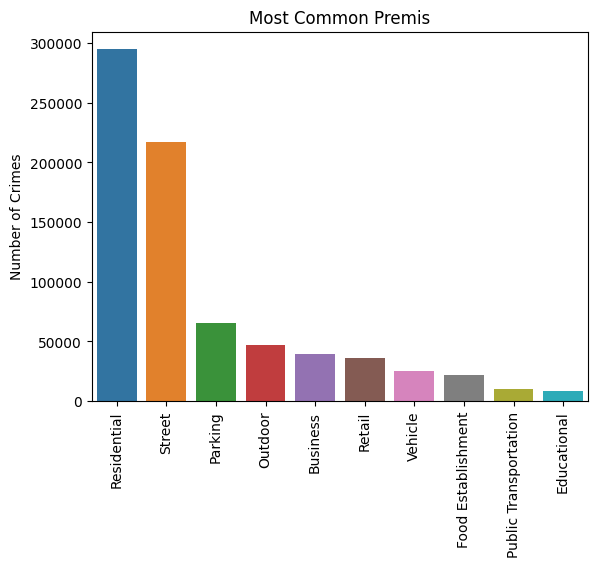

In [ ]:
# Cleaned Premis Desc
df['Cleaned Premis Desc'] = df['Premis Desc'].map(premis_cat_mapping)

sns.barplot(x=df['Cleaned Premis Desc'].value_counts().head(10).index, y=df['Cleaned Premis Desc'].value_counts().head(10))

plt.ylabel("Number of Crimes")
plt.title("Most Common Premis")

plt.xticks(rotation=90)

plt.show()



In [ ]:

# Create a mapping of cleaned severity
severity_mapping = {
 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT':'Aggravated Assault',
 'CONTEMPT OF COURT':'Misdemeanor',
 'THEFT PLAIN - PETTY ($950 & UNDER)':'Petty',
 'SHOTS FIRED AT INHABITED DWELLING':'Felony',
 'INTIMATE PARTNER - AGGRAVATED ASSAULT':'Aggravated Assault',
 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)':'Grand Theft',
 'DISCHARGE FIREARMS/SHOTS FIRED':'Felony',
 'ATTEMPTED ROBBERY':'Attempted',
 'BURGLARY, ATTEMPTED':'Attempted',
 'PICKPOCKET':'Petty',
 'ROBBERY':'Felony',
 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)':'Felony',
 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)':'Petty',
 'VIOLATION OF RESTRAINING ORDER':'Unknown',
 'BUNCO, GRAND THEFT':'Grand Theft',
 'THEFT OF IDENTITY':'Felony',
 'BURGLARY FROM VEHICLE':'Felony',
 'INTIMATE PARTNER - SIMPLE ASSAULT':'Simple Assault',
 'BATTERY - SIMPLE ASSAULT':'Simple Assault',
 'CRIMINAL THREATS - NO WEAPON DISPLAYED':'Felony',
 'BURGLARY':'Felony',
 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD':'Grand Theft',
 'VIOLATION OF TEMPORARY RESTRAINING ORDER':'Unknown',
 'TRESPASSING':'Misdemeanor',
 'BIKE - STOLEN':'Petty',
 'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)':'Grand Theft',
 'OTHER MISCELLANEOUS CRIME':'Unknown',
 'OTHER ASSAULT':'Unknown',
 'BRANDISH WEAPON':'Felony',
 'VIOLATION OF COURT ORDER':'Misdemeanor',
 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)':'Misdemeanor',
 'VEHICLE - ATTEMPT STOLEN':'Attempted',
 'CRUELTY TO ANIMALS':'Unknown',
 'THREATENING PHONE CALLS/LETTERS':'Misdemeanor',
 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)':'Petty',
 'CRIMINAL HOMICIDE':'Felony',
 'BATTERY POLICE (SIMPLE)':'Simple Assault',
 'THEFT PLAIN - ATTEMPT':'Attempted',
 'FIREARMS RESTRAINING ORDER (FIREARMS RO)':'Felony',
 'EXTORTION':'Felony',
 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)':'Grand Theft',
 'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)':'Grand Theft',
 'DOCUMENT FORGERY / STOLEN FELONY':'Felony',
 'BATTERY ON A FIREFIGHTER':'Felony',
 'UNAUTHORIZED COMPUTER ACCESS':'Felony',
 'KIDNAPPING':'Felony',
 'VEHICLE - STOLEN':'Grand Theft',
 'ORAL COPULATION':'Felony',
 'THEFT FROM MOTOR VEHICLE - ATTEMPT':'Attempted',
 'ARSON':'Felony',
 'THEFT, PERSON':'Felony',
 'BURGLARY FROM VEHICLE, ATTEMPTED':'Attempted',
 'BUNCO, PETTY THEFT':'Petty',
 'FALSE IMPRISONMENT':'Felony',
 'THROWING OBJECT AT MOVING VEHICLE':'Felony',
 'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT':'Felony',
 'DISTURBING THE PEACE':'Misdemeanor',
 'FAILURE TO YIELD':'Misdemeanor',
 'KIDNAPPING - GRAND ATTEMPT':'Attempted',
 'BOMB SCARE':'Felony',
 'PROWLER':'Unknown',
 'FALSE POLICE REPORT':'Misdemeanor',
 'THEFT FROM PERSON - ATTEMPT':'Attempted',
 'PURSE SNATCHING':'Petty',
 'STALKING':'Felony',
 'RESISTING ARREST':'Misdemeanor',
 'CONTRIBUTING':'Unknown',
 'BUNCO, ATTEMPT':'Attempted',
 'DRIVING WITHOUT OWNER CONSENT (DWOC)':'Unknown',
 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER':'Aggravated Assault',
 'CREDIT CARDS, FRAUD USE ($950 & UNDER':'Petty',
 'DOCUMENT WORTHLESS ($200.01 & OVER)':'Felony',
 'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)':'Petty',
 'BLOCKING DOOR INDUCTION CENTER':'Misdemeanor',
 'PANDERING':'Felony',
 'CREDIT CARDS, FRAUD USE ($950.01 & OVER)':'Felony',
 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE':'Felony',
 'THEFT, COIN MACHINE - PETTY ($950 & UNDER)':'Petty',
 'RECKLESS DRIVING':'Misdemeanor',
 'ILLEGAL DUMPING':'Misdemeanor',
 'DISHONEST EMPLOYEE - GRAND THEFT':'Grand Theft',
 'DISHONEST EMPLOYEE - PETTY THEFT':'Petty',
 'PURSE SNATCHING - ATTEMPT':'Attempted',
 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01':'Grand Theft',
 'SHOPLIFTING - ATTEMPT':'Attempted',
 'COUNTERFEIT':'Felony',
 'DISHONEST EMPLOYEE ATTEMPTED THEFT':'Attempted',
 'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)':'Grand Theft',
 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER':'Petty',
 'MANSLAUGHTER, NEGLIGENT':'Felony',
 'WEAPONS POSSESSION/BOMBING':'Felony',
 'TILL TAP - PETTY ($950 & UNDER)':'Petty',
 'DRUNK ROLL':'Misdemeanor',
 'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)':'Felony',
 'TILL TAP - GRAND THEFT ($950.01 & OVER)':'Grand Theft',
 'CONSPIRACY':'Felony',
 'BRIBERY':'Felony',
 'GRAND THEFT / INSURANCE FRAUD':'Grand Theft',
 'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)':'Felony',
 'BIGAMY':'Felony',
 'TELEPHONE PROPERTY - DAMAGE':'Felony',
 'THEFT, COIN MACHINE - ATTEMPT':'Attempted',
 'PICKPOCKET, ATTEMPT':'Attempted',
 'DOCUMENT WORTHLESS ($200 & UNDER)':'Misdemeanor',
 'DISRUPT SCHOOL':'Misdemeanor',
 'LYNCHING':'Felony',
 'BIKE - ATTEMPTED STOLEN':'Attempted',
 'PETTY THEFT - AUTO REPAIR':'Petty'
}




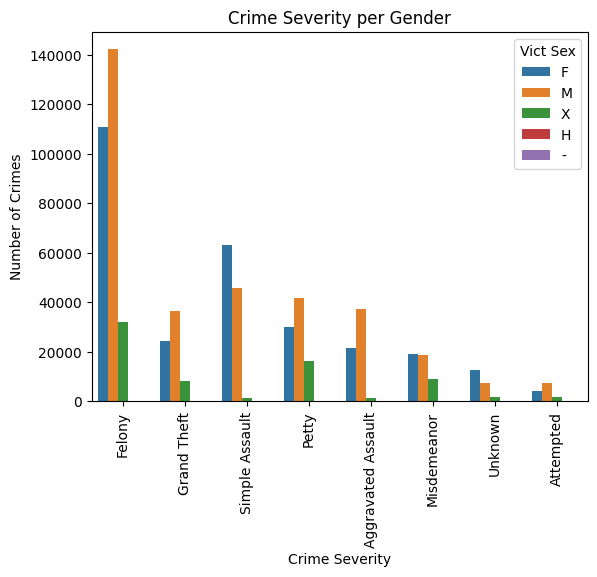

In [ ]:
# Crime Severity
df['Crime Severity'] = df['Crm Cd Desc'].map(severity_mapping)

# Visualize crime severity per gender
severity_counts = df['Crime Severity'].value_counts().sort_values(ascending=False).index
sns.countplot(x="Crime Severity", data=df, hue="Vict Sex", order=severity_counts)

plt.ylabel("Number of Crimes")
plt.xlabel("Crime Severity")
plt.title("Crime Severity per Gender")
plt.xticks(rotation=90)
plt.show()

In [ ]:

weapon_mapping = {
    'FOLDING KNIFE': 'Knife',
    'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)': 'Physical Force',
    'UNKNOWN WEAPON/OTHER WEAPON': 'Unknown',
    'SEMI-AUTOMATIC PISTOL': 'Firearm',
    'MACE/PEPPER SPRAY': 'Chemical Spray',
    'HAND GUN': 'Firearm',
    'PIPE/METAL PIPE': 'Blunt Instrument',
    'BLUNT INSTRUMENT': 'Blunt Instrument',
    'VERBAL THREAT': 'Threat',
    'CONCRETE BLOCK/BRICK': 'Blunt Instrument',
    'VEHICLE': 'Vehicle',
    'BOTTLE': 'Bottle',
    'UNKNOWN FIREARM': 'Firearm',
    'STRAIGHT RAZOR': 'Sharp Object',
    'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH': 'Knife',
    'FIRE': 'Fire',
    'HAMMER': 'Blunt Instrument',
    'STICK': 'Blunt Instrument',
    'PHYSICAL PRESENCE': 'Physical Force',
    'SIMULATED GUN': 'Firearm',
    'MACHETE': 'Knife',
    'OTHER FIREARM': 'Firearm',
    'KITCHEN KNIFE': 'Knife',
    'KNIFE WITH BLADE 6INCHES OR LESS': 'Knife',
    'OTHER KNIFE': 'Knife',
    'CLUB/BAT': 'Blunt Instrument',
    'BELT FLAILING INSTRUMENT/CHAIN': 'Blunt Instrument',
    'UNKNOWN TYPE CUTTING INSTRUMENT': 'Sharp Object',
    'ROCK/THROWN OBJECT': 'Thrown Object',
    'BOARD': 'Blunt Instrument',
    'AIR PISTOL/REVOLVER/RIFLE/BB GUN': 'Firearm',
    'SEMI-AUTOMATIC RIFLE': 'Firearm',
    'SCISSORS': 'Sharp Object',
    'OTHER CUTTING INSTRUMENT': 'Sharp Object',
    'RIFLE': 'Firearm',
    'ICE PICK': 'Sharp Object',
    'HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE': 'Firearm',
    'STUN GUN': 'Electric Shock',
    'GLASS': 'Sharp Object',
    'SWORD': 'Sharp Object',
    'REVOLVER': 'Firearm',
    'EXPLOXIVE DEVICE': 'Explosive',
    'RAZOR': 'Sharp Object',
    'AXE': 'Blunt Instrument',
    'SCREWDRIVER': 'Sharp Object',
    'SWITCH BLADE': 'Knife',
    'TIRE IRON': 'Blunt Instrument',
    'SHOTGUN': 'Firearm',
    'BRASS KNUCKLES': 'Blunt Instrument',
    'SCALDING LIQUID': 'Chemical',
    'FIXED OBJECT': 'Blunt Instrument',
    'ASSAULT WEAPON/UZI/AK47/ETC': 'Firearm',
    'TOY GUN': 'Firearm (Toy)',
    'DOG/ANIMAL (SIC ANIMAL ON)': 'Animal',
    'CAUSTIC CHEMICAL/POISON': 'Chemical',
    'RAZOR BLADE': 'Sharp Object',
    'DIRK/DAGGER': 'Sharp Object',
    'ROPE/LIGATURE': 'Strangulation',
    'BOMB THREAT': 'Explosive',
    'CLEAVER': 'Knife',
    'LIQUOR/DRUGS': 'Substance',
    'SYRINGE': 'Sharp Object',
    'AUTOMATIC WEAPON/SUB-MACHINE GUN': 'Firearm',
    'DEMAND NOTE': 'Threat',
    'SAWED OFF RIFLE/SHOTGUN': 'Firearm',
    'UZI SEMIAUTOMATIC ASSAULT RIFLE': 'Firearm',
    'MAC-11 SEMIAUTOMATIC ASSAULT WEAPON': 'Firearm',
    'STARTER PISTOL/REVOLVER': 'Firearm',
    'BOW AND ARROW': 'Projectile Weapon',
    'UNK TYPE SEMIAUTOMATIC ASSAULT RIFLE': 'Firearm',
    'MAC-10 SEMIAUTOMATIC ASSAULT WEAPON': 'Firearm',
    'RELIC FIREARM': 'Firearm',
    'MARTIAL ARTS WEAPONS': 'Weapon',
    'BOWIE KNIFE': 'Knife',
    'ANTIQUE FIREARM': 'Firearm',
    'BLACKJACK': 'Blunt Instrument',
    'M1-1 SEMIAUTOMATIC ASSAULT RIFLE': 'Firearm'
}

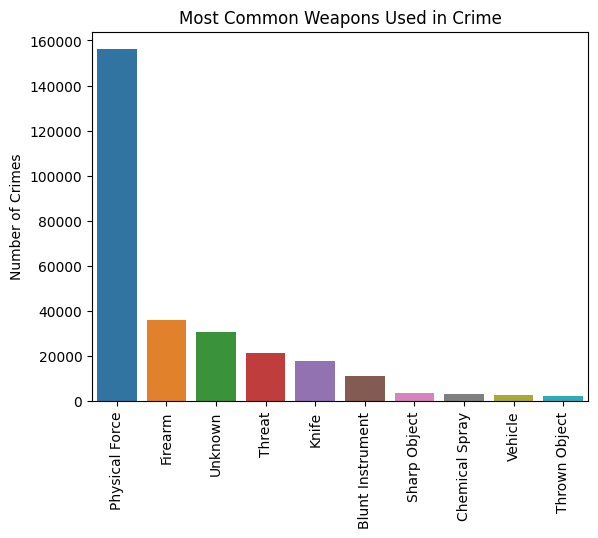

In [ ]:
# Cleaned Weapon Desc
df["Cleaned Weapon Desc"] = df['Weapon Desc'].map(weapon_mapping)

sns.barplot(x=df['Cleaned Weapon Desc'].value_counts().head(10).index, y=df['Cleaned Weapon Desc'].value_counts().head(10))

plt.ylabel("Number of Crimes")
plt.title("Most Common Weapons Used in Crime")

plt.xticks(rotation=90)

plt.show()



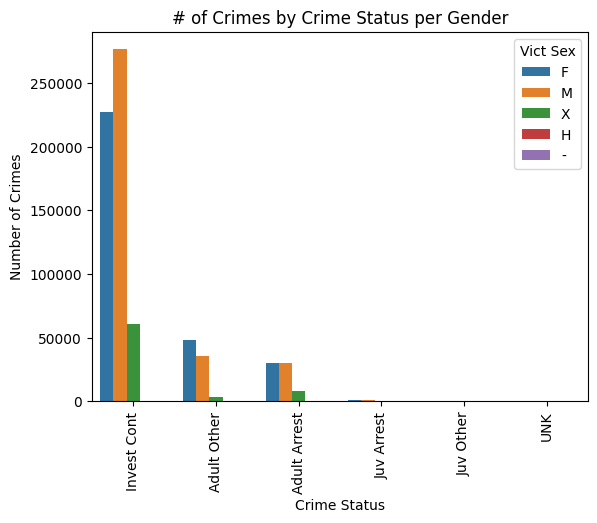

In [ ]:
# Status Desc
severity_counts = df['Status Desc'].value_counts().sort_values(ascending=False).index

sns.countplot(x="Status Desc", data=df, hue="Vict Sex", order=severity_counts)

plt.ylabel("Number of Crimes")
plt.xlabel("Crime Status")
plt.title("# of Crimes by Crime Status per Gender")
plt.xticks(rotation=90)
plt.show()

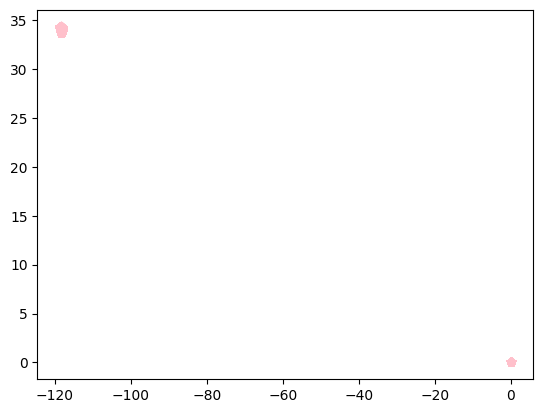

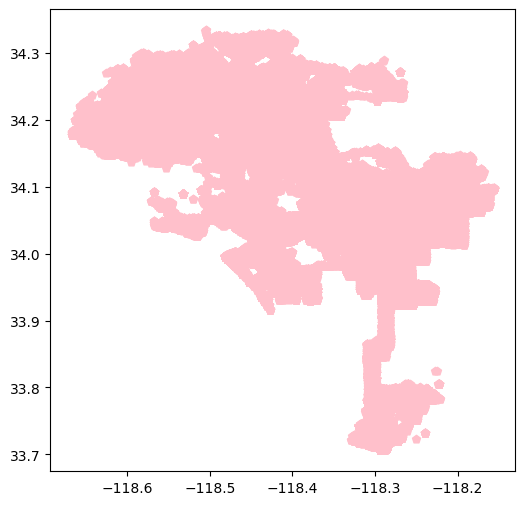

In [ ]:
# Drop columns with a large amount of missing data
df = df.drop(['Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street'], axis=1)

# Visualize location data
plt.scatter(x=df["LON"], y=df["LAT"], marker="p", c="pink")
plt.show()

# Clean up unreasonable values in 'LON' and 'LAT' columns
mask = df["LON"] > -118
df = df[~mask]

plt.figure(figsize=(6, 6))
plt.scatter(x=df["LON"], y=df["LAT"], marker="p", c="pink")
plt.show()


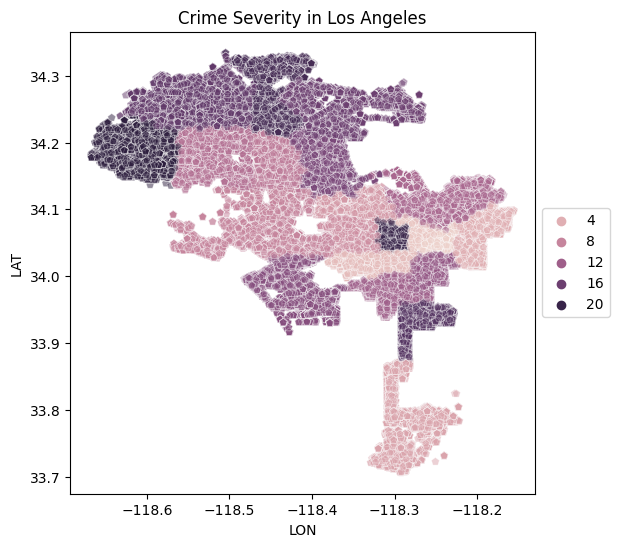

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=df["LON"], y=df["LAT"], marker="p", hue=df["AREA"], alpha=.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Crime Severity in Los Angeles")
plt.show()

In [ ]:
df["diff_occ_rptd"] = df["Date Rptd"] - df["DATE OCC"]
df["diff_occ_rptd"].describe()

df_new = df[['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'diff_occ_rptd', 'AREA', 'AREA NAME',
              'Rpt Dist No', 'Crm Cd', 'Crm Cd Desc', 'Cleaned Crm Cd Desc', 'Crime Severity', 'Vict Age',
              'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Cleaned Premis Desc', 'Weapon Used Cd',
              'Weapon Desc', 'Cleaned Weapon Desc', 'Status Desc', 'Crm Cd 1', 'LOCATION', 'LAT', 'LON']]

# Drop rows with missing values in 'Crm Cd 1'
df_new = df_new.dropna(subset=['Crm Cd 1'], how='any')



In [ ]:
new_data_set = df[['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'diff_occ_rptd', 'AREA', 'AREA NAME',
              'Rpt Dist No', 'Crm Cd', 'Crm Cd Desc', 'Cleaned Crm Cd Desc', 'Crime Severity', 'Vict Age',
              'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Cleaned Premis Desc', 'Weapon Used Cd',
              'Weapon Desc', 'Cleaned Weapon Desc', 'Status Desc', 'Crm Cd 1', 'LOCATION', 'LAT', 'LON']]

In [ ]:
n_column_names = [['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'diff_occ_rptd', 'AREA', 'AREA NAME',
              'Rpt Dist No', 'Crm Cd', 'Crm Cd Desc', 'Cleaned Crm Cd Desc', 'Crime Severity', 'Vict Age',
              'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Cleaned Premis Desc', 'Weapon Used Cd',
              'Weapon Desc', 'Cleaned Weapon Desc', 'Status Desc', 'Crm Cd 1', 'LOCATION', 'LAT', 'LON']]

In [ ]:

# Create a mapping for column names
column_mapping = {
    'DR_NO': 'DR_NO',
    'Date Rptd': 'Reported_Date',
    'DATE OCC': 'Occurred_Date',
    'TIME OCC': 'Ocurred_Time',
    'hour': 'Hour',
    'diff_occ_rptd': 'diff_occ_rptd (hours)',
    'AREA': 'Area_Code',
    'AREA NAME': 'Area_Name',
    'Rpt Dist No': 'Rpt_Dist_No',
    'Crm Cd': 'Crime_Code',
    'Crm Cd Desc': 'Crime_Description',
    'Cleaned Crm Cd Desc': 'Cleaned_Crime_Description',
    'Crime Severity': 'Crime_Severity',
    'Vict Age': 'Victim_Age',
    'Vict Sex': 'Victim_Sex',
    'Vict Descent': 'Victim_Ethnicity',
    'Premis Cd': 'Premises_Code',
    'Premis Desc': 'Premises_Description',
    'Cleaned Premis Desc': 'Cleaned_Premises_Description',
    'Weapon Used Cd': 'Weapon_Used_Code',
    'Weapon Desc': 'Weapon_Description',
    'Cleaned Weapon Desc': 'Cleaned_Weapon_Description',
    'Status Desc': 'Status_Description',
    'Crm Cd 1': 'Crime_Code_1',
    'LOCATION': 'Location',
    'LAT': 'Latitude',
    'LON': 'Longitude'
}
# Rename columns using the mapping
new_data_set.rename(columns=column_mapping, inplace=True)

<ipython-input-127-cd2db2db227e>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_set.rename(columns=column_mapping, inplace=True)


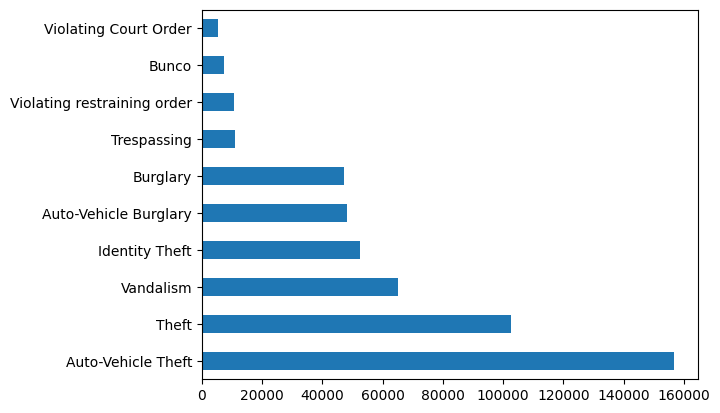

In [ ]:
# Drop unnecessary columns from the dataset
ml_df = new_data_set.drop(["DR_NO", "Rpt_Dist_No", "Crime_Description", "Crime_Code", "Premises_Description",
                      "Weapon_Used_Code", "Premises_Code", "Area_Code", "Weapon_Description", "Location",
                      'Reported_Date', 'Occurred_Date'], axis=1)

# Check and handle missing values in "Cleaned_Weapon_Description"
missing_weapon_desc = ml_df[ml_df['Cleaned_Weapon_Description'].isnull()]
missing_weapon_desc['Cleaned_Crime_Description'].value_counts().head(10).plot(kind='barh')

# Identify entries with missing data in "Cleaned_Weapon_Description" as crimes that don't involve weapons
ml_df['Cleaned_Weapon_Description'] = ml_df['Cleaned_Weapon_Description'].fillna('Unknown')

# Drop rows with missing values in "Crime_Code_1"
ml_df = ml_df.dropna(subset=["Crime_Code_1"])

# Remove categories with less than 10 entries in "Cleaned_Crime_Description"
ml_df = ml_df[~ml_df["Cleaned_Crime_Description"].isin(["Lynching", "Bigamy", "FIREARMS EMERGENCY PROTECTIVE ORDER",
                                                        "Restraining Order", "Disrupt School", "Bribery",
                                                        "Blocking Door Induction", "Conspiracy", "Manslaughter",
                                                        "REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)",
                                                        "Weapon Possesion"])]

# Remove categories with less than 10 entries in "Cleaned_Premises_Description"
ml_df = ml_df[~ml_df["Cleaned_Premises_Description"].isin(["Funeral Services", "Waste Management", "Energy Plant", "Technology"])]

# Remove categories with less than 10 entries in "Cleaned_Weapon_Description"
ml_df = ml_df[~ml_df["Cleaned_Weapon_Description"].isin(["Projectile Weapon", "Weapon"])]

# Remove categories with less than 10 entries in "Status_Description"
ml_df = ml_df[~ml_df["Status_Description"].isin(["UNK"])]



In [ ]:
ml_df["Cleaned_Crime_Description"].value_counts()

Auto-Vehicle Theft                     157657
Theft                                  107027
Vandalism                               72868
Battery                                 68688
Burglary                                54242
Domestic Violence                       53123
Assault                                 52752
Identity Theft                          52510
Auto-Vehicle Burglary                   51163
Robbery                                 32938
Criminal Threats                        17743
Brandishing a weapon                    12958
Trespassing                             11485
Violating restraining order             11249
Bunco                                    7487
Miscellaneous Crime                      5936
Violating Court Order                    5693
Embezzlement                             3436
Forgery                                  2972
Contempt of Court                        2426
Firearm Discharge                        2420
Arson                             

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)